In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal



In [5]:
df_benin = pd.read_csv('../../data/benin-malanville_clean.csv')
df_sierraleone = pd.read_csv('../../data/sierraleone-bumbuna_clean.csv')
df_togo = pd.read_csv('../../data/togo-dapaong_qc_clean.csv')

In [7]:
# Add region labels

df_benin['Region'] = 'Benin'
df_sierraleone['Region'] = 'Sierra Leone'
df_togo['Region'] = 'Togo'

#combine all regions
df_all = pd.concat([df_benin, df_sierraleone, df_togo], ignore_index=True)
# define metrics
metrics = ['GHI', 'DNI', 'DHI']



In [24]:
def plot_boxplots(df: pd.DataFrame, metrics: list):
    """Generate side-by-side boxplots for each metric."""
    for metric in metrics:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Region', y=metric, data=df, palette='Set2')
        plt.title(f'{metric} Distribution by Region')
        plt.ylabel(f'{metric} (W/m²)')
        plt.xlabel('Region')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

In [16]:
def compute_summary_table(df: pd.DataFrame, metrics: list) -> pd.DataFrame:
    """Compute mean, median, and standard deviation for selected metrics."""
    summary = df.groupby('Region')[metrics].agg(['mean', 'median', 'std']).round(2)
    summary.columns = ['_'.join(col) for col in summary.columns] 
    return summary

# Metric Comparison


Boxplots

C:\Users\hp\AppData\Local\Temp\ipykernel_5848\3861837782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y=metric, data=df, palette='Set2')


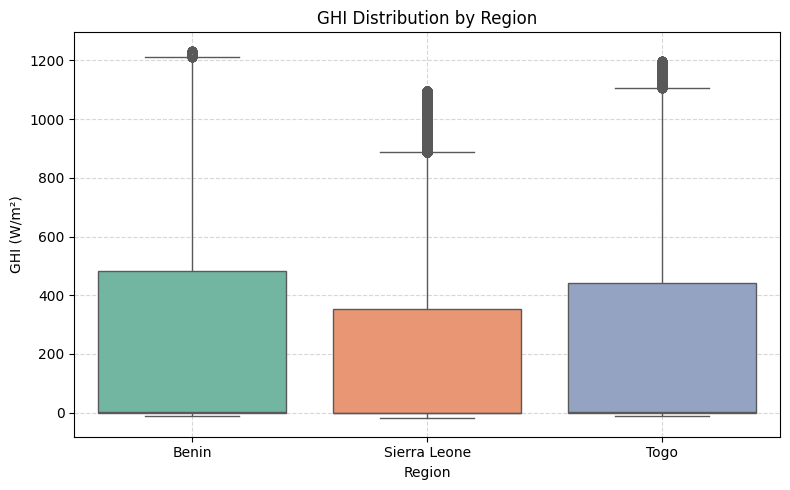

C:\Users\hp\AppData\Local\Temp\ipykernel_5848\3861837782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y=metric, data=df, palette='Set2')


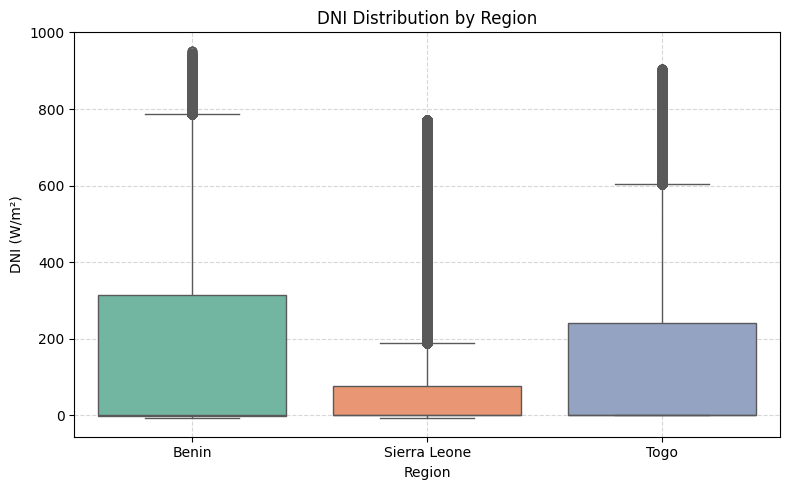

C:\Users\hp\AppData\Local\Temp\ipykernel_5848\3861837782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y=metric, data=df, palette='Set2')


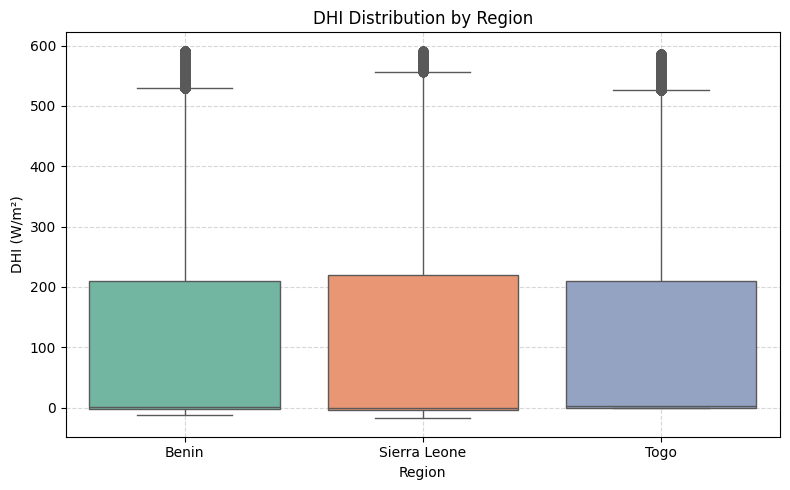

In [25]:
plot_boxplots(df_all, metrics)

Summary Table

In [17]:
summary = compute_summary_table(df_all, metrics)
display(summary)

,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Region,,,,,,,,,
Benin,240.34,1.8,330.87,167.19,-0.1,261.71,110.91,1.6,152.92
Sierra Leone,196.44,0.3,291.24,104.53,-0.1,201.70,110.11,-0.1,154.17
Togo,229.83,2.1,321.64,149.37,0.0,248.55,112.41,2.5,151.29


# Statistical Tests

In [34]:

def statistical_tests(df: pd.DataFrame, metric: str, method: str = 'anova'):
    """statistical test (ANOVA or Kruskal-Wallis) on a metric across countries."""
    region_groups = [group[metric].dropna() for name, group in df.groupby('Region')]
    
    if method == 'anova':
        stat, p_value = f_oneway(*region_groups)
        print(f"One-way ANOVA for {metric}: F = {stat:.3f}, p = {p_value:.4f}")
    elif method == 'kruskal':
        stat, p_value = kruskal(*region_groups)
        print(f"Kruskal–Wallis test for {metric}: H = {stat:.3f}, p = {p_value:.4f}")
    else:
        raise ValueError("Method must be 'anova' or 'kruskal'")
    
    if p_value < 0.05:
        print("Result: Statistically significant difference between regions.\n")
    else:
        print("Result: No statistically significant difference between regions.\n")


In [35]:
statistical_tests(df_all, 'GHI')
statistical_tests(df_all, 'GHI', method='kruskal')

One-way ANOVA for GHI: F = 2782.622, p = 0.0000
Result: Statistically significant difference between regions.

Kruskal–Wallis test for GHI: H = 5142.448, p = 0.0000
Result: Statistically significant difference between regions.



# Key Observations
- Benin shows the highest overall solar potential (GHI and DNI), but also has the most variability.

- Togo has moderate potential with slightly more stable DHI values.

- Sierra Leone appears to have the least solar potential, and some unusual median values suggest possible data quality issues.

# Summary Graph

In [38]:
def plot_avg_summary_bar(summary_df: pd.DataFrame, metric: str):
    """
    Plot a bar chart ranking countries by average value of a given metric (GHI_mean).
    """
    metric_col = f'{metric}_mean'
    data = summary_df[[metric_col]].sort_values(by=metric_col, ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=data.index, y=data[metric_col], palette='Blues_d')
    plt.title(f'Average {metric} by Region')
    plt.ylabel(f'Mean {metric} (W/m²)')
    plt.xlabel('Region')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5848\4100569751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[metric_col], palette='Blues_d')


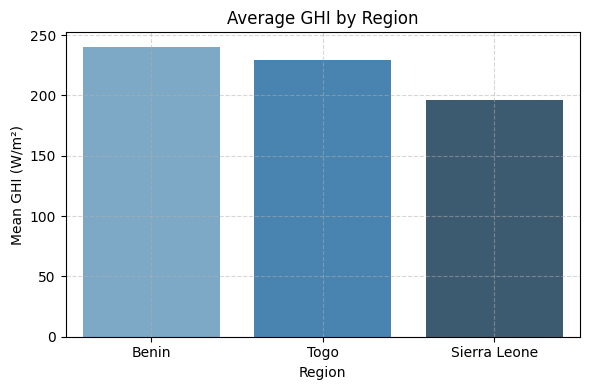

In [39]:
plot_avg_summary_bar(summary, 'GHI')